# Image_Proccess_Resize

### Import pkgs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.metrics import log_loss, accuracy_score
from IPython.display import display
import skimage
%matplotlib inline

In [2]:
import os
import time
import zipfile
import lzma
import pickle
from PIL import Image
from shutil import copy2
import cv2

import gc

### Run name

In [3]:
project_name = 'SC_Iceberg_Classifier'
step_name = 'Image_Proccess_Resize'
date_str = time.strftime("%Y%m%d", time.localtime())
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)
t0 = time.time()

run_name: SC_Iceberg_Classifier_Image_Proccess_Resize_20180110_083826


### Basic folders

In [4]:
cwd = os.getcwd()
input_path = os.path.join(cwd, 'input')
log_path = os.path.join(cwd, 'log')
model_path = os.path.join(cwd, 'model')
output_path = os.path.join(cwd, 'output')
print('input_path: ' + input_path)
print('log_path: ' + log_path)
print('model_path: ' + model_path)
print('output_path: ' + output_path)

input_path: D:\Kaggle\statoil-iceberg-classifier-challenge\input
log_path: D:\Kaggle\statoil-iceberg-classifier-challenge\log
model_path: D:\Kaggle\statoil-iceberg-classifier-challenge\model
output_path: D:\Kaggle\statoil-iceberg-classifier-challenge\output


### Basic functions

In [5]:
import sys
def describe(arr):
    print(arr.shape, arr.min(), arr.max(), sys.getsizeof(arr))

In [6]:
def show_data_images(rows, fig_column, id_data, y_data, *args):
    columns = len(args)
    figs, axes = plt.subplots(rows, columns, figsize=(rows, fig_column*columns))
    print(axes.shape)  
    for i, ax in enumerate(axes):
        y_data_str = ''
        if type(y_data) != type(None):
            y_data_str =  '_' + str(y_data[i])
        ax[0].set_title(id_data[i] + y_data_str)
        for j, arg in enumerate(args):
            ax[j].imshow(arg[i])

In [7]:
from skimage import transform,data

def resize_image(arr, size=200):
    new_arr = np.zeros((arr.shape[0], size, size))
    for i, img in enumerate(arr):
        new_arr[i] = transform.resize(img, (size, size), mode='reflect')
    return new_arr
# test
aa = np.ones((3, 75, 75))
bb = resize_image(aa)
print(bb.shape)

(3, 200, 200)


### Load data

In [8]:
id_data_path = os.path.join(input_path, 'id_data.p')
id_test_path = os.path.join(input_path, 'id_test.p')
id_data = pickle.load(open(id_data_path, mode='rb'))
id_test = pickle.load(open(id_test_path, mode='rb'))

is_iceberg_path = os.path.join(input_path, 'is_iceberg.p')
y_data = pickle.load(open(is_iceberg_path, mode='rb'))

band1_data_path = os.path.join(input_path, 'band1_data.p')
band2_data_path = os.path.join(input_path, 'band2_data.p')
band1_test_path = os.path.join(input_path, 'band1_test.p')
band2_test_path = os.path.join(input_path, 'band2_test.p')

band1_data = pickle.load(open(band1_data_path, mode='rb'))
band2_data = pickle.load(open(band2_data_path, mode='rb'))
band1_test = pickle.load(open(band1_test_path, mode='rb'))
band2_test = pickle.load(open(band2_test_path, mode='rb'))

describe(band1_data)
describe(band2_data)
describe(band1_test)
describe(band2_test)

(1604, 75, 75) -45.594448 34.574917 128
(1604, 75, 75) -45.655499 20.154249 128
(8424, 75, 75) -45.6805458069 37.090523 128
(8424, 75, 75) -49.0835 37.0905227661 128


In [9]:
%%time
band1_data_gray_path = os.path.join(input_path, 'band1_data_gray.p')
band2_data_gray_path = os.path.join(input_path, 'band2_data_gray.p')
band1_test_gray_path = os.path.join(input_path, 'band1_test_gray.p')
band2_test_gray_path = os.path.join(input_path, 'band2_test_gray.p')

band1_data_gray = pickle.load(open(band1_data_gray_path, mode='rb'))
band2_data_gray = pickle.load(open(band2_data_gray_path, mode='rb'))
band1_test_gray = pickle.load(open(band1_test_gray_path, mode='rb'))
band2_test_gray = pickle.load(open(band2_test_gray_path, mode='rb'))

describe(band1_data_gray)
describe(band2_data_gray)
describe(band1_test_gray)
describe(band2_test_gray)

(1604, 75, 75) 0.0 1.0 128
(1604, 75, 75) 0.0 1.0 128
(8424, 75, 75) 0.0 1.0 128
(8424, 75, 75) 0.0 1.0 128
Wall time: 1.33 s


### Resize

In [10]:
%%time
band1_data200 = resize_image(band1_data)
band2_data200 = resize_image(band2_data)
band1_test200 = resize_image(band1_test)
band2_test200 = resize_image(band2_test)

Wall time: 1min 7s


In [11]:
%%time
band1_data200_path = os.path.join(input_path, 'band1_data200.p')
band2_data200_path = os.path.join(input_path, 'band2_data200.p')
band1_test200_path = os.path.join(input_path, 'band1_test200.p')
band2_test200_path = os.path.join(input_path, 'band2_test200.p')

pickle.dump(band1_data200, open(band1_data200_path, 'wb'))
pickle.dump(band2_data200, open(band2_data200_path, 'wb'))
pickle.dump(band1_test200, open(band1_test200_path, 'wb'))
pickle.dump(band2_test200, open(band2_test200_path, 'wb'))

Wall time: 2min 9s


In [12]:
%%time
band1_data_gray200 = resize_image(band1_data_gray)
band2_data_gray200 = resize_image(band2_data_gray)
band1_test_gray200 = resize_image(band1_test_gray)
band2_test_gray200 = resize_image(band2_test_gray)

Wall time: 1min 13s


In [13]:
%%time
band1_data_gray200_path = os.path.join(input_path, 'band1_data_gray200.p')
band2_data_gray200_path = os.path.join(input_path, 'band2_data_gray200.p')
band1_test_gray200_path = os.path.join(input_path, 'band1_test_gray200.p')
band2_test_gray200_path = os.path.join(input_path, 'band2_test_gray200.p')

pickle.dump(band1_data_gray200, open(band1_data_gray200_path, 'wb'))
pickle.dump(band2_data_gray200, open(band2_data_gray200_path, 'wb'))
pickle.dump(band1_test_gray200, open(band1_test_gray200_path, 'wb'))
pickle.dump(band2_test_gray200, open(band2_test_gray200_path, 'wb'))

Wall time: 59.3 s


In [14]:
describe(id_data)
describe(id_test)
describe(y_data)

describe(band1_data200)
describe(band2_data200)
describe(band1_test200)
describe(band2_test200)

describe(band1_data_gray200)
describe(band2_data_gray200)
describe(band1_test_gray200)
describe(band2_test_gray200)

(1604,) 000d71b1 fffe76e4 12928
(8424,) 000c65d7 fff77564 67488
(1604,) 0 1 12936
(1604, 200, 200) -43.7854120586 34.0897745469 513280128
(1604, 200, 200) -43.7102979453 19.6770783281 513280128
(8424, 200, 200) -45.6072757542 36.3698417656 2695680128
(8424, 200, 200) -46.4361122623 35.9653404728 2695680128
(1604, 200, 200) 0.000844704366712 0.999744526507 513280128
(1604, 200, 200) 0.0015674269665 0.999808870819 513280128
(8424, 200, 200) 0.0 1.0 2695680128
(8424, 200, 200) 0.0 1.0 2695680128


(6, 4)


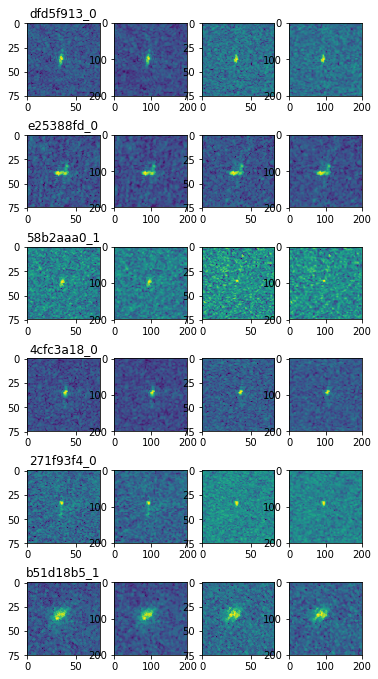

In [15]:
show_data_images(6, 3, id_data, y_data, band1_data, band1_data200, band2_data, band2_data200)

(6, 4)


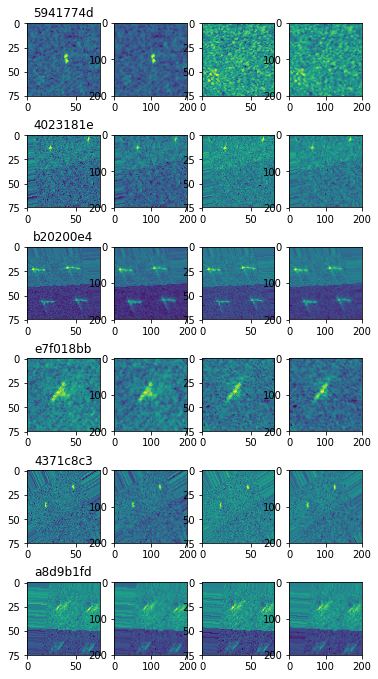

In [16]:
show_data_images(6, 3, id_test, None, band1_test, band1_test200, band2_test, band2_test200)

(6, 4)


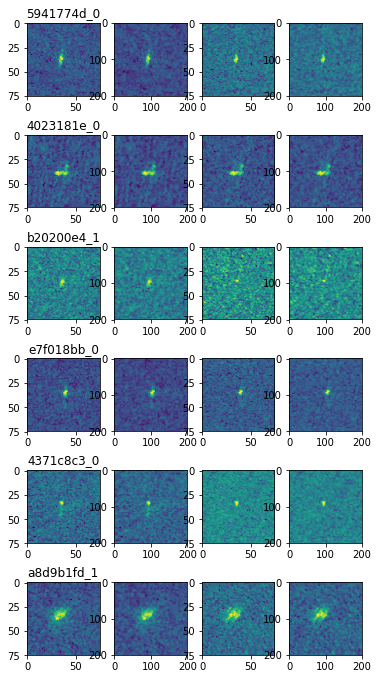

In [17]:
show_data_images(6, 3, id_test, y_data, band1_data_gray, band1_data_gray200, band2_data_gray, band2_data_gray200)

(6, 4)


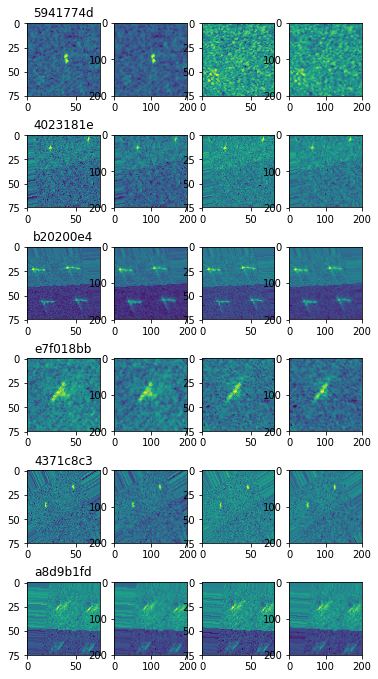

In [18]:
show_data_images(6, 3, id_test, None, band1_test_gray, band1_test_gray200, band2_test_gray, band2_test_gray200)

In [19]:
t1 = time.time()
print('time cost: %.2f s' % (t1-t0))
print('Done!')

time cost: 386.52 s
Done!


In [20]:
print(run_name)

SC_Iceberg_Classifier_Image_Proccess_Resize_20180110_083826
